In [133]:
# import tensorflow as tf
# from tensorflow import keras
import numpy as np
import yaml
import pandas as pd
from itertools import product
from samplers import SliceSampler
#from slice_sampler import SliceSampler
import pickle
import uuid

import boundary_functions as bf
import multiprocessing as mp
import cddm_data_simulation as cd
from cdwiener import batch_fptd
#from np_network import np_predict
#from kde_info import KDEStats

import keras_to_numpy as ktnp
import matplotlib.pyplot as plt

# INITIALIZATIONS -------------------------------------------------------------
machine = 'x7'
method = 'ddm_ndt'
n_data_samples = 2500
n_slice_samples = 5000
n_sims = 10
n_cpus = 'all'

#stats = pickle.load(open("kde_stats.pickle", "rb"))
#method_params = stats[method]

if machine == 'x7':
    stats = pickle.load(open("/media/data_cifs/afengler/git_repos/nn_likelihoods/kde_stats.pickle", "rb"))
    method_params = stats[method]
    output_folder = method_params['output_folder_x7']
    with open("model_paths_x7.yaml") as tmp_file:
        network_path = yaml.load(tmp_file)[method]
if machine == 'ccv':
    stats = pickle.load(open("/users/afengler/git_repos/nn_likelihoods/kde_stats.pickle", "rb"))
    method_params = stats[method]
    output_folder = method_params['output_folder']
    with open("model_paths.yaml") as tmp_file:
        network_path = yaml.load(tmp_file)[method]
        
print(stats)
print(method_params)

# model = keras.models.load_model(network_path, custom_objects=custom_objects)
# fcn = keras.models.load_model(fcn_path, custom_objects=fcn_custom_objects)

# Load weights, biases and activations of current network --------
with open(network_path + "weights.pickle", "rb") as tmp_file:
    weights = pickle.load(tmp_file)
with open(network_path + 'biases.pickle', 'rb') as tmp_file:
    biases = pickle.load(tmp_file)
with open(network_path + 'activations.pickle', 'rb') as tmp_file:
    activations = pickle.load(tmp_file)

{'lba': {'dgp': <built-in function rlba>, 'data_folder': '/users/afengler/data/kde/lba/train_test_data_20000', 'data_folder_x7': '/media/data_cifs/afengler/data/kde/lba/train_test_data_20000', 'output_folder': '/users/afengler/data/kde/lba/posterior_samples/', 'output_folder_x7': '/media/data_cifs/afengler/data/kde/lba/posterior_samples/', 'model_folder': '/users/afengler/data/kde/lba/keras_models/', 'model_folder_x7': '/media/data_cifs/afengler/data/kde/lba/keras_models/', 'param_names': ['v_0', 'v_1', 'A', 'b', 's'], 'boundary_param_names': [], 'param_bounds': [[1.0, 2.0], [1.0, 2.0], [0.0, 1.0], [1.5, 3.0], [0.1, 0.2]], 'boundary_param_bounds': []}, 'lba_ndt': {'dgp': <built-in function rlba>, 'data_folder': '/users/afengler/data/kde/lba/train_test_data_ndt_20000', 'data_folder_x7': '/media/data_cifs/afengler/data/kde/lba/train_test_data_ndt_20000', 'output_folder': '/users/afengler/data/kde/lba/method_comparison/', 'output_folder_x7': '/media/data_cifs/afengler/data/kde/lba/method_

/home/afengler/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:38: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [146]:
# Load training data 
import os
training_files = os.listdir('/media/data_cifs/afengler/data/kde/ddm/train_test_data_ndt_20000')
train_dat = pickle.load(open('/media/data_cifs/afengler/data/kde/ddm/train_test_data_ndt_20000/' + training_files[1], 'rb'))

In [147]:
train_dat.loc[train_dat['log_l'] < np.log(1e-7), 'log_l'] = np.log(1e-7)

In [148]:
out = ktnp.predict(train_dat.iloc[:, :-1], weights, biases, activations)

In [149]:
train_dat['prediction'] = out

In [150]:
prediction_error = np.abs(train_dat['prediction'] - train_dat['log_l'])

(array([9.72363e+05, 7.86000e+03, 2.95700e+03, 1.75500e+03, 1.14200e+03,
        8.91000e+02, 6.70000e+02, 5.23000e+02, 4.56000e+02, 3.82000e+02,
        3.35000e+02, 3.14000e+02, 2.50000e+02, 2.40000e+02, 1.82000e+02,
        1.97000e+02, 1.62000e+02, 1.92000e+02, 1.59000e+02, 1.30000e+02,
        1.08000e+02, 1.04000e+02, 1.03000e+02, 8.40000e+01, 9.20000e+01,
        7.70000e+01, 6.30000e+01, 6.40000e+01, 6.10000e+01, 3.60000e+01,
        5.40000e+01, 4.10000e+01, 3.60000e+01, 3.10000e+01, 1.60000e+01,
        2.00000e+01, 1.30000e+01, 1.80000e+01, 2.00000e+01, 1.00000e+01,
        9.00000e+00, 9.00000e+00, 7.00000e+00, 6.00000e+00, 6.00000e+00,
        3.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([9.82897674e-09, 1.44297035e-01, 2.88594059e-01, 4.32891084e-01,
        5.77188109e-01, 7.21485133e-01, 8.65782158e-01, 1.01007918e+00,
        1.15437621e+00, 1.29867323e+00, 1.44297026e+00, 1.58726728e+00,
        1.73156431e+00, 1.87586133e+00, 2.02015836e+

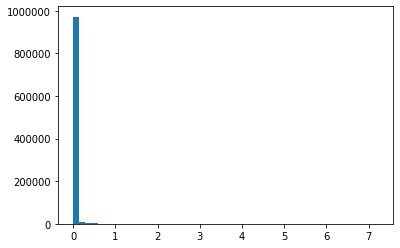

In [151]:
plt.hist(prediction_error, bins = 50)

In [138]:
prediction_error = np.abs(train_dat['prediction'] - train_dat['log_l'])

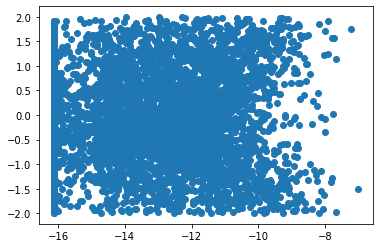

In [169]:
plt.scatter(train_dat.loc[prediction_error > 1, 'log_l'], train_dat.loc[prediction_error > 1, 'v'])

(array([6207., 1738., 2556., 3144., 3194., 3412., 4031., 2835.,  667.,
          85.]), array([-16.35226326, -14.58969761, -12.82713196, -11.06456631,
         -9.30200066,  -7.53943501,  -5.77686936,  -4.01430371,
         -2.25173806,  -0.48917241,   1.27339324]), <a list of 10 Patch objects>)

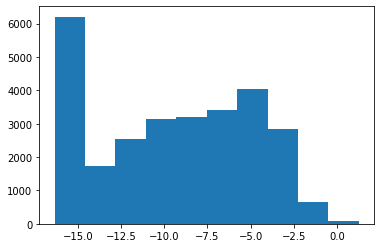

In [145]:
plt.hist(train_dat.loc[prediction_error > 0.1, 'prediction'], bins = 10)

In [68]:
np.unique(out[prediction_error > 9])

array([-4.76514324])

(array([162869.,   3294.,   1315.,    547.,    349.,    351.,    319.,
           374.,    414.,    420.,    474.,    539.,    542.,    629.,
           688.,    738.,    756.,    786.,    775.,    833.,    910.,
           923.,    958.,   1026.,   1075.,   1265.,   1428.,   1681.,
          2086.,   2768.,   3353.,   4578.,   6100.,   8197.,  11084.,
         15169.,  20697.,  27962.,  37413.,  48480.,  63181.,  79072.,
         92538., 107647., 110568.,  82708.,  50412.,  22567.,   7995.,
          1403.]),
 array([-16.35226326, -15.99086906, -15.62947486, -15.26808066,
        -14.90668645, -14.54529225, -14.18389805, -13.82250384,
        -13.46110964, -13.09971544, -12.73832124, -12.37692703,
        -12.01553283, -11.65413863, -11.29274442, -10.93135022,
        -10.56995602, -10.20856182,  -9.84716761,  -9.48577341,
         -9.12437921,  -8.76298501,  -8.4015908 ,  -8.0401966 ,
         -7.6788024 ,  -7.31740819,  -6.95601399,  -6.59461979,
         -6.23322559,  -5.87183138, 

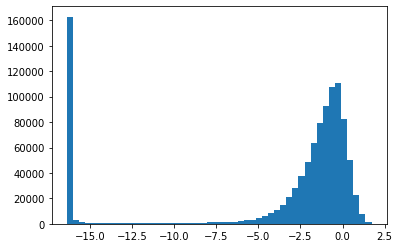

In [141]:
plt.hist(out, bins = 50)

In [128]:
min(out)

array([-16.43996964])

In [129]:
np.log(1e-7)

-16.11809565095832